# Introducción a procesamiento de lenguaje natural (PLN)

El procesamiento de lenguaje natural (NLP) es un conjunto de técnicas computacionales empleadas para el análisis automático del lenguaje humano, de manera que intenta crear modelos que tengan una amplia comprensión del lenguaje. Entre sus aplicaciones se encuentra la traducción de textos, el resumen automático de textos, el modelado de tópicos, *question-answering*, entre otros.

Los textos se obtienen de distintas fuentes, por lo caul normalmente tienen diferentes características y su análisis depende en gran parte de tales características.

El procedimiento normalmente consiste en :

- Obtención del texto
- Preprocesamiento
- Representación
- Modelación

## Preprocesamiento

El preproceso y normalización de texto es una parte muy importante para su posterior modelación y análisis. Este puede incluir alguno de los siguientes operaciones:

- Convertir letras a minúsculas o mayúsculas
- Remover números o convertirlos a palabras
- Remover signos de puntuación, acentos y otros signos diacríticos
- Remover caracteres repetidos, incluídos espacios en blanco
- Remover caracteres con poca frecuencia
- Remover palabras funcionales o stop words
- Convertir símbolos a palabras (emojis y otros)
- Stemming, lematización y POS-tagging

### Stemming

Proceso heurístico para, secuencialmente, remover las partes finales de una palabra (affixes) para obtener su "raíz". Es una forma básica para hacer análisis morfológico. Por ejemplo, considera las palabras

|token | stemming|
| --- | --- |
|  operate     |   oper |
|  operating   |   oper |
|  operates    |   oper |
|  operation   |   oper |
|  operative   |   oper |
|  operatives  |   oper |
|  operational |   oper |

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Ejemplo de stemming en ingles**

In [1]:
from nltk.stem import PorterStemmer
e_words= ["wait", "waiting", "waited", "waits"]
ps =PorterStemmer()
for w in e_words:
    rootWord=ps.stem(w)
    print(rootWord)

wait
wait
wait
wait


In [8]:
sentence="Hello, You have to build a very good site and I love visiting your site."
words = word_tokenize(sentence)
ps = PorterStemmer()

for w in words:
    print("Stemming for {} is {}".format(w,ps.stem(w)))

Stemming for Hello is hello
Stemming for , is ,
Stemming for You is you
Stemming for have is have
Stemming for to is to
Stemming for build is build
Stemming for a is a
Stemming for very is veri
Stemming for good is good
Stemming for site is site
Stemming for and is and
Stemming for I is i
Stemming for love is love
Stemming for visiting is visit
Stemming for your is your
Stemming for site is site
Stemming for . is .


**Ejemplo de stemming en español**

In [2]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish")

print("Comprado"+ "   Stemming: " +stemmer.stem("comprado"))
print("Comprada"+ "   Stemming: " +stemmer.stem("comprada"))
print("Compre"+ "     Stemming: " +stemmer.stem("compre"))
print("Comprar"+ "    Stemming: " +stemmer.stem("comprar"))

Comprado   Stemming: compr
Comprada   Stemming: compr
Compre     Stemming: compr
Comprar    Stemming: compr


In [9]:
sentence="Hola, mi nombre es Daniel, mucho gusto conocerlos"
words = word_tokenize(sentence)
stemmer = SnowballStemmer("spanish")

for w in words:
    print("Stemming para {} es {}".format(w,stemmer.stem(w)))

Stemming para Hola es hol
Stemming para , es ,
Stemming para mi es mi
Stemming para nombre es nombr
Stemming para es es es
Stemming para Daniel es daniel
Stemming para , es ,
Stemming para mucho es much
Stemming para gusto es gust
Stemming para conocerlos es conoc


### Lematización

Análisis morfológico para obtener el *"lema"* de cada palabra, es decir, una forma normalizada de un conjunto de términos morfológicamente relacionados (como aparece generalmente en un diccionario).
    
|      token  | stemming |      lemma| POS |
|      ---  | --- |      ---| --- |
|    operate  |   oper |    operate  | VB  |
|  operating  |   oper |    operate  | VBG |
|   operates  |   oper |    operate  | VBZ |
|  operation  |   oper |  operation  | NN  |
|  operative  |   oper |  operative  | NN  |
| operatives  |   oper |  operative  | NNS |
|operational  |   oper | operational |  JJ |

Hay diferentes formas de realizarlo. El más común es obtener su etiqueta gramatical (POS-tag) y luego obtener su lema en un diccionario. Dependiente del idioma.

In [12]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


## Representaciones de textos

### One-hot encoding

Dado un vocabulario, usamos variables *dummy* para indicar la presencia o ausencia de las palabras del vocabulario en algún documento.

__El orden NO es importante__

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

samples = ['El perro se comió mi tarea.', 'Mi vecina se pelea con otra vecina.', 'El gato toca el piano.']

vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), max_features=25, binary=True)
X = vectorizer.fit_transform(samples)
one_hot = X.toarray()
one_hot_df = pd.DataFrame(one_hot,columns=vectorizer.get_feature_names_out())
one_hot_df

,comió,con,el,gato,mi,otra,pelea,perro,piano,se,tarea,toca,vecina
0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0,1,0,0,1,1,1,0,0,1,0,0,1
2,0,0,1,1,0,0,0,0,1,0,0,1,0


### Bolsa de palabras (Bag of words)

In [14]:
samples = ['El perro se comió mi tarea.', 'Mi vecina se pelea con otra vecina.', 'El gato toca el piano.']

vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), max_features=25, binary=False)
X = vectorizer.fit_transform(samples)
bow = X.toarray()
bow_df = pd.DataFrame(bow,columns=vectorizer.get_feature_names_out())
bow_df

,comió,con,el,gato,mi,otra,pelea,perro,piano,se,tarea,toca,vecina
0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0,1,0,0,1,1,1,0,0,1,0,0,2
2,0,0,2,1,0,0,0,0,1,0,0,1,0


### Term Frequency - Inverse Document Frequency (TF-IDF)

El Term Frequency - Inverse Document Frequency (TF-IDF) consiste en:

- Frecuencia de términos: $tf_{t,d} = \text{count}(t,d)$, o también: $tf = log(\text{count}(t,d)+1)$
- Frecuencia de documentos: $df_t = \text{count}(d:t\in d)$
- Frecuencia de documentos inversa: $idf_t = \log\frac{N}{1+df_t}$


Entonces
\begin{align*}
\text{TF-IDF}: tf_{t,d} \times idf_t
\end{align*}


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_words = 10000
samples = ['El perro se comió mi tarea.', 'Mi vecina se pelea con otra vecina.', 'El gato toca el piano.']

vectorizer = TfidfVectorizer(lowercase=False, ngram_range= (1,1), max_features=max_words)
X = vectorizer.fit_transform(samples)
tf_idf = X.toarray()
tf_idf_df = pd.DataFrame(tf_idf,columns=vectorizer.get_feature_names_out())
tf_idf_df

,El,Mi,comió,con,el,gato,mi,otra,pelea,perro,piano,se,tarea,toca,vecina
0,0.334907,0.000000,0.440362,0.000000,0.000000,0.000000,0.440362,0.000000,0.000000,0.440362,0.000000,0.334907,0.440362,0.000000,0.000000
1,0.000000,0.341426,0.000000,0.341426,0.000000,0.000000,0.000000,0.341426,0.341426,0.000000,0.000000,0.259663,0.000000,0.000000,0.682852
2,0.355432,0.000000,0.000000,0.000000,0.467351,0.467351,0.000000,0.000000,0.000000,0.000000,0.467351,0.000000,0.000000,0.467351,0.000000


Si bien los modelos basados en representaciones tipo BOW son muy útiles para ciertas tareas y ciertos corpus de textos, para otros no es la mejor opción.

Básicamente, los problemas de BOW y sus extensiones son
- Altamente dimensional
- Sparse

## Word embeddings

__Word embeddings__: Representaciones vectoriales densas de una longitud predefinida, donde podemos inferir propiedades semánticas de las palabras, tales como su significado, mediante la semántica distribucional. Para obtenerlos, se usa un __modelo de lenguaje__.


Los modelos que asignan __probabilidades__ a __secuencias de palabras__ se les llaman modelos de lenguaje. Introducir probabilidades nos permite inferir características semánticas de las palabras, tales como el **significado**, al observar la distribución de las palabras alrededor de alguna de interés.

La idea detrás del concepto de *words embeddings* consiste en asignar a cada palabra dentro del vocabulario un vector real que represente distintos aspectos (vector de características). Estos vectores de características se emplean para expresar la función de probabilidad conjunta de las secuencias de palabras, de manera que en los modelos de lenguaje neuronal se aprende simultáneamente los vectores de características de las palabras y los parámetros de la función probabilidad.

Dado un vocabulario $V$, la probabilidad conjunta se modela (y se aprende) mediante $P(w_t|w_1^{t-1})=f(w_t,\ldots,w_{t-n+1})$. Consta de dos partes:
1. Un mapeo $E(i)$ para cualquier elemento $i$ de $V$ a un vector $E(i)=\mathbf{e} \in \mathbb{R}^d$. Este mapeo es representado por la matriz $\mathbf{E}_{d \times |V|}$ (en el paper de Bengio se representa por $C_{d \times |V|}$).
2. Una función de probabilidad obtenida mediante una función $g(\cdot)$:
    \begin{align*}
      f(i, w_{t-1},\ldots,w_{t-n+1})=g(i,E(w_{t-1}),\ldots,E(w_{t-n+1})).
    \end{align*}

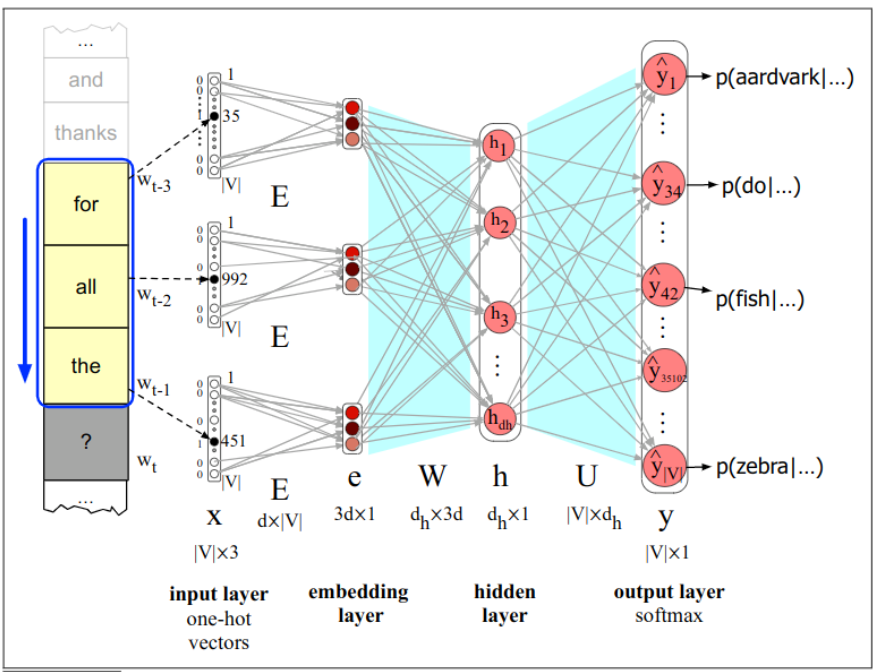

El modelo conocido como *Transformer* ha logrado ser una base fundamental en el campo del procesamiento del lenguaje natural debido a sus mecanismos de atención que consisten en una operación que pondera los valores de una secuencia de entrada, lo que permite al modelo enfocarse en la información relevante o relacionada. Además, esta arquitectura cuenta con una estructura *encoder-decoder* introduce el concepto de atención *multi-head*, enfoque que permite que el modelo aprenda diferentes representaciones de atención, lo cual se puede efectuar de forma paralela, aumentando la capacidad para capturar diferentes relaciones semánticas y de manera más eficiente.

En particular, los *embeddings* producidos por la arquitectura de *Bidirectional Encoder Representations from Transformers* (BERT) han sido muy populares por su capacidad de generar representaciones vectoriales contextuales. BERT es un modelo de representación de lenguaje compuesto por una arquitectura multicapa bidireccional de *Transformer* utilizando como entradas una secuencia de *tokens* construidos usando *WordPiece embeddings*.